<a href="https://colab.research.google.com/github/OrianaOsorio/Deep_Learning-/blob/main/Deep_Learning_MLvideo_TUTORIAL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Deep Learning Tutorial
Consiste en cinco pasos sencillos, los cuales son piezas clave en todos los modelos de deep learning.

Step 1 : Recolección de datos de entrenamiento y de prueba, se recomienda, una gran cantidad de datos para mejorar la precisión en el modelo

Step 2: Construcción del modelo a utilizar. Se mostrará que es realmente sencillo su codificación sin embargo la matemática involucrada es algo compleja que requiere años de estudios. involucra el modelo del entramado de la red, funciones de activación, función de error y optimización del error. 

Step 3: Entrenamiento de la Red, en este pasó es necesario entender el concepto de epoch, y de overfitty o sobre entrenamiento.

Step 4: Evaluación de nuestro modelo, usando los datos de prueba obtenidos en el paso 1.

Step 5: Predicción. Con la evaluación dada conforme, ya podemos pasar al paso de predicción o mejor dicho a la aplicación o al menos alistarnos para ello.
 


**Step 1 Recolectar una base de datos (dataset)**

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.3.0


In [ ]:
#===============================================================#
##Código para reproducir resultados los mas proximo posible
# Seed value (can actually be different for each attribution step)
seed_value= 0

# 1. Set `PYTHONHASHSEED` environment variable at a fixed value
import os
os.environ['PYTHONHASHSEED']=str(seed_value)

# 2. Set `python` built-in pseudo-random generator at a fixed value
import random
random.seed(seed_value)

# 3. Set `numpy` pseudo-random generator at a fixed value
import numpy as np
np.random.seed(seed_value)

# 4. Set `tensorflow` pseudo-random generator at a fixed value
import tensorflow as tf
tf.set_random_seed(seed_value)

# 5. Configure a new global `tensorflow` session
from keras import backend as K
session_conf = tf.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.Session(graph=tf.get_default_graph(), config=session_conf)
K.set_session(sess)

#===============================================================#

from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1 Recolectar una base de datos (dataset)
# Traing and testing data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# Normalizamos los datos (accelera el entrenamiento)
train_images , test_images = train_images/255 , test_images /255
X_train, X_val, y_train, y_val = train_test_split( train_images, train_labels, test_size=0.2, random_state=43,shuffle=True)


AttributeError: ignored

Cantidad de muestras:  48000
Dimensiones de cada imagen : (28, 28)
Label:  6


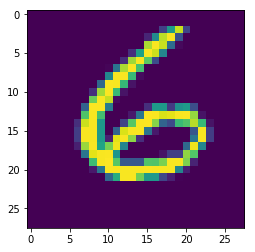

In [ ]:
#@title Visualizando de la base de datos X_train { run: "auto" }
Posición = 14069 #@param {type:"slider", min:0, max:47999, step:1}
n = Posición # indice de prueba

#print(train_images[0])
print("Cantidad de muestras: ",len(y_train))
print("Dimensiones de cada imagen :",X_train[0].shape)
print("Label: ",y_train[n])
_=plt.imshow(X_train[n])

**Step 2 : Construir tu modelo**

In [ ]:
# Step 2 : Construir tu modelo
model = Sequential()
model.add(Flatten(input_shape=[28,28]))
model.add(Dense(512, activation = tf.nn.relu))#, input_shape=(784,)))
model.add(Dense(256, activation = tf.nn.relu))
model.add(Dense(10,activation = tf.nn.softmax)) 
# softmax = Genera una salida con una distribución de probabilidad dentro de  [0 , 1]
# en donde la suma de todos es 1. Usado para clasificacion multiclase

# Parte final del modelo (optimización del error) 
# Basicamente Distribución de probabilidad de la predicción 
# Loss = es lo que la red optimizará en el entrenamiento
#    No se preocupen 'categorical_crossentropy' es solo una palabra bonita XD
#    Lo que literalmente hace es comparar la distribución de probabilidad que 
#    entrega la red neuronal con los datos de entrenamiento. 
# optimizer = es el metodo con el que se entrenara la red neuronal (existen muchos)
#    basicamente no hay que preocuparse por la matemática detras

model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
model.summary()






Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


**Step 3 Entrenar la red (train)**

In [ ]:
# Step 3 Entrenar la red (train)
# epochs = significa un barrido de todos los datos de entranamiento. Lo que 
#   tenemos ahora son 60 000 imagenes, asi que en cada entrenamiento la red
#   barre con todos los 60 000 datos.
# Loss == Error (en deep learning) X_train, X_val, y_train, y_val
epochs = 6
history = model.fit(X_train, y_train, epochs = epochs,validation_data=(X_val,y_val),shuffle=False)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 48000 samples, validate on 12000 samples
Epoch 1/6
48000/48000 [==============================] - 12s 250us/step - loss: 0.2029 - acc: 0.9386 - val_loss: 0.1188 - val_acc: 0.9626
Epoch 2/6
48000/48000 [==============================] - 8s 176us/step - loss: 0.0851 - acc: 0.9744 - val_loss: 0.0978 - val_acc: 0.9713
Epoch 3/6
48000/48000 [==============================] - 8s 166us/step - loss: 0.0533 - acc: 0.9836 - val_loss: 0.0955 - val_acc: 0.9725
Epoch 4/6
48000/48000 [==============================] - 8s 173us/step - loss: 0.0374 - acc: 0.9883 - val_loss: 0.1173 - val_acc: 0.9702
Epoch 5/6
48000/48000 [==============================] - 8s 170us/step - loss: 0.0331 - acc: 0.9890 - val_loss: 0.1050 - val_acc: 0.9730
Epoch 6/6
48000/48000 [==============================] - 8s 171us/step - loss: 0.0286 - acc: 0.9906 - val_loss: 0.1226 - val_acc: 0.9733


**Step 4 Evaluar el modelo (TEST )**

In [ ]:
# Step 4 Evaluar el modelo (Test )
loss, accuracy = model.evaluate(test_images, test_labels)
print('Accuracy_test_final% =', accuracy*100) # Es la precisión del modelo ya entrenado
print('loss      =', loss) # Error del modelo ya entrenado con respecto a nuestro datos de prueba


10000/10000 [==============================] - 0s 39us/step
Accuracy_test_final% = 97.87
loss      = 0.09064185261679086


Acc_val_max (Epoch)=  6
Acc_val_max% =  97.50833333333333


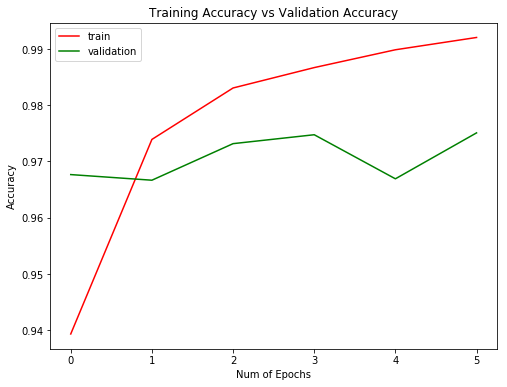

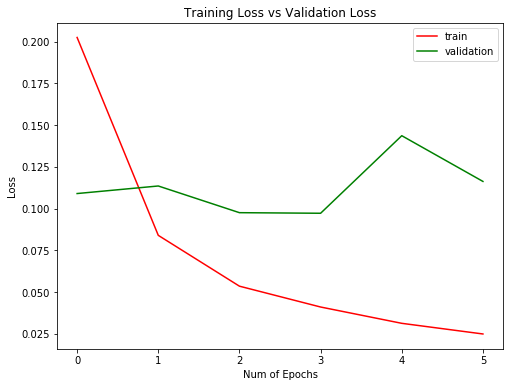

In [ ]:
# Graficando los indicadores de rendimiento
# se toma el más óptimo y se vuelve a entrenar con los hiperparámetros óptimos
plt.figure(0)
plt.plot(history.history['acc'],'r')
plt.plot(history.history['val_acc'],'g')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])
print("Acc_val_max (Epoch)= ",np.argmax(history.history['val_acc'])+1)
print("Acc_val_max% = ",np.max(history.history['val_acc'])*100)
 
 
plt.figure(1)
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'g')
plt.xticks(np.arange(0, epochs, 1.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])
 
 
plt.show()

**Step 5 Predecir usando el modelo (predict)**

Número Identificado por la NN:  4


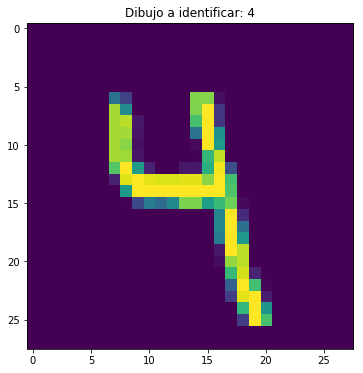

In [ ]:
# Step 5 Predecir un resultado (predict)
#@title Seleccionar Elemento de prueba { run: "auto" }

Posición_de_la_muestra = 6037 #@param {type:"slider", min:0, max:9999, step:1}
n = Posición_de_la_muestra # indice de prueba
scores = model.predict(test_images[n:n+1])
print("Número Identificado por la NN: ", np.argmax(scores))
_=plt.imshow(test_images[n])
_=plt.title(str("Dibujo a identificar: "+str(test_labels[n])))

# GPU NvidiaT4

In [ ]:
!nvidia-smi

Fri Jul 12 18:09:46 2019       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 418.67       Driver Version: 410.79       CUDA Version: 10.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    15W /  70W |      0MiB / 15079MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
                                                                               
+-----------------------------------------------------------------------------+
| Processes:                                                       GPU Memory |
|  GPU  

In [ ]:
import tensorflow as tf
tf.__version__

'1.14.0'